In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# Load the IRIS dataset
di = pd.read_csv("IRIS.csv")

In [4]:
di.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
di.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
di.shape

(150, 5)

In [7]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
di.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


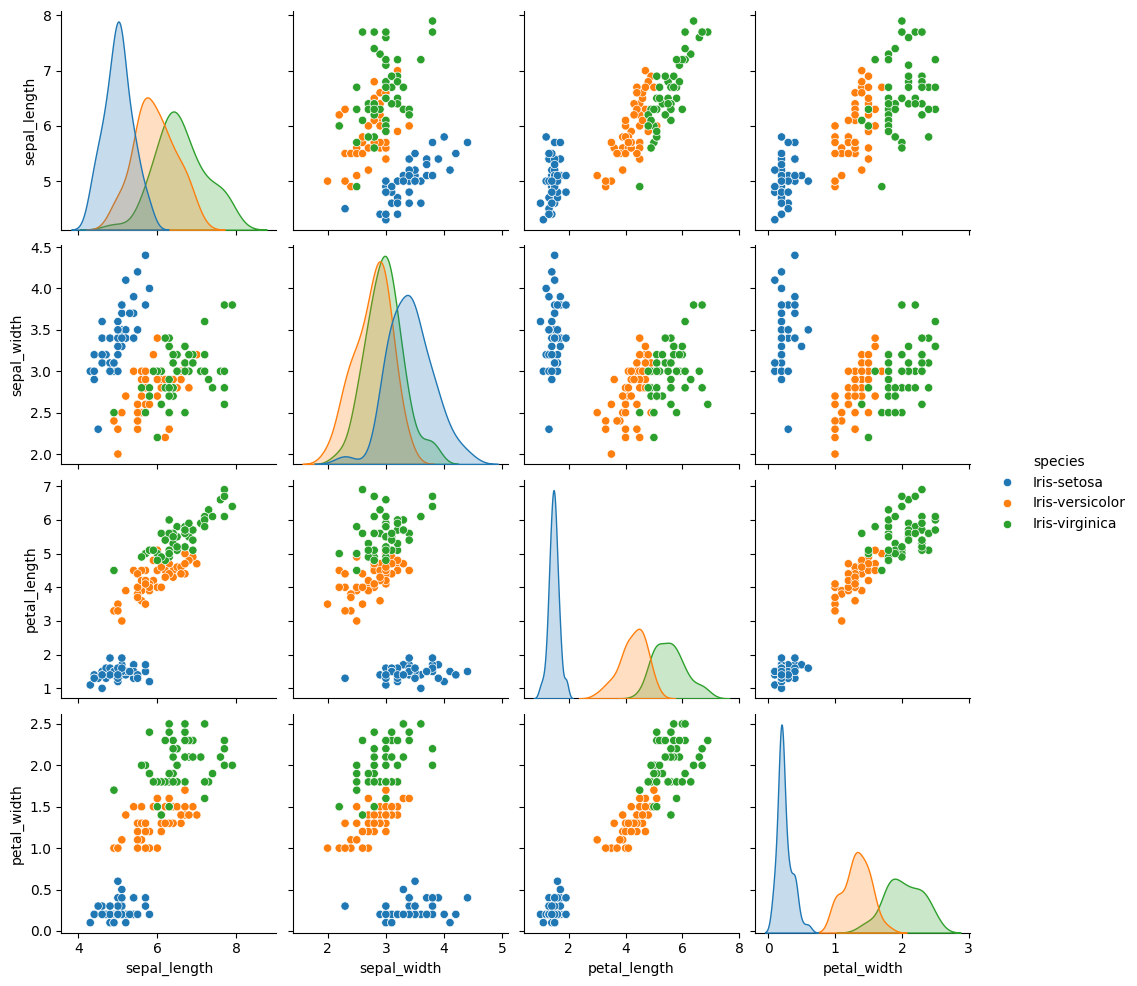

In [9]:
# Visualize the relationship between species
# and sepal/petal measurements

sns.pairplot(di, hue='species')

plt.show()

<ipython-input-10-913bb77937a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = di, x='species', palette='Set2')


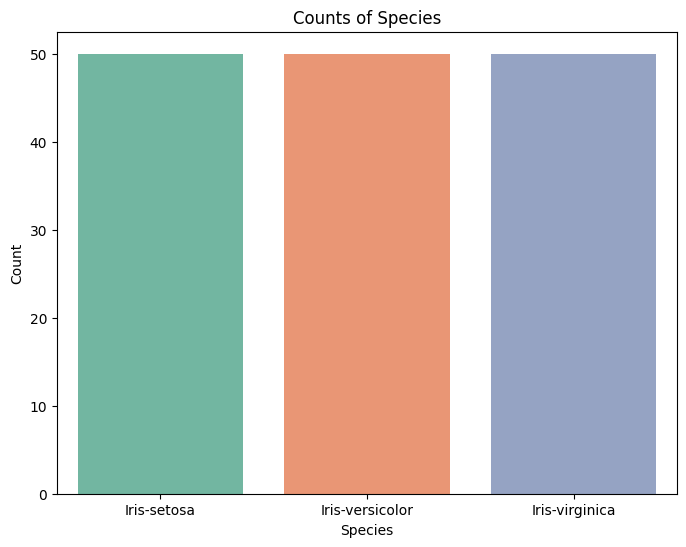

In [10]:
# Counts of Species
plt.figure(figsize=(8, 6))
sns.countplot(data = di, x='species', palette='Set2')
plt.title('Counts of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

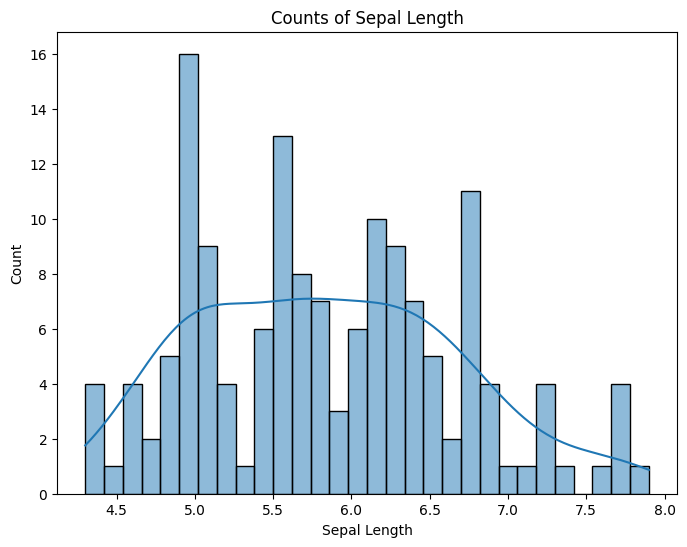

In [11]:
# Counts of sepal length
plt.figure(figsize=(8, 6))
sns.histplot(data= di, x='sepal_length', bins=30, kde=True)
plt.title('Counts of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.show()

<ipython-input-12-1c05587f0ed2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=di, x='sepal_width', palette='Set3')


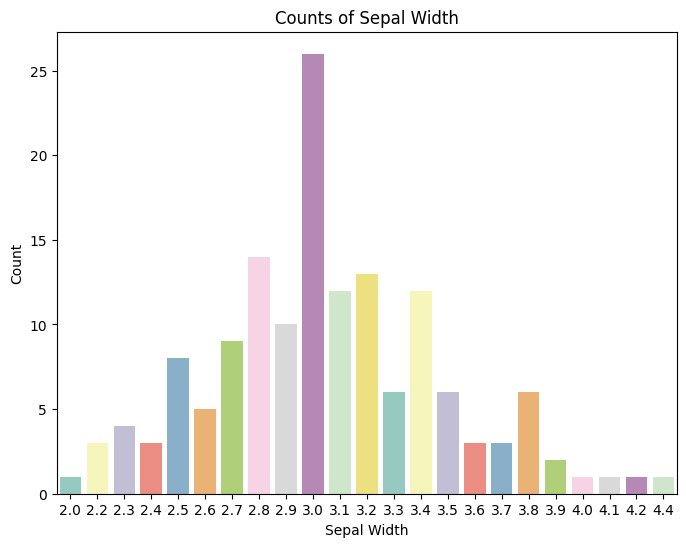

In [12]:
# Count of Sepal width
plt.figure(figsize=(8, 6))
sns.countplot(data=di, x='sepal_width', palette='Set3')
plt.title('Counts of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.show()

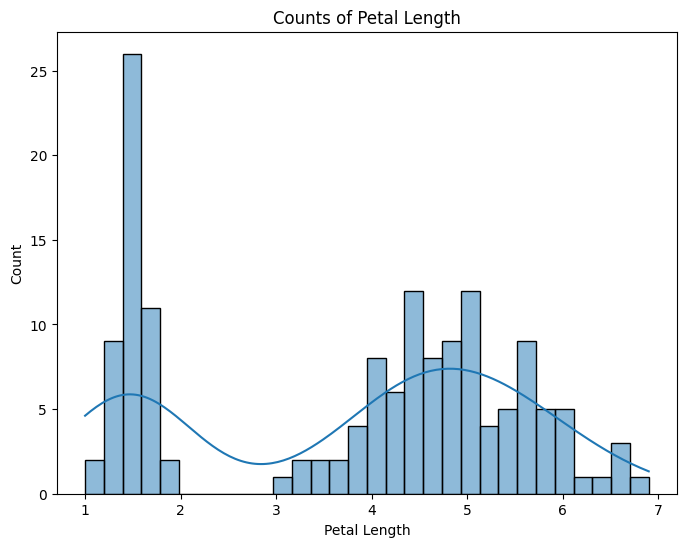

In [13]:
# Count of Petal Length
plt.figure(figsize=(8, 6))
sns.histplot(data= di, x='petal_length', bins=30, kde=True)
plt.title('Counts of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.show()

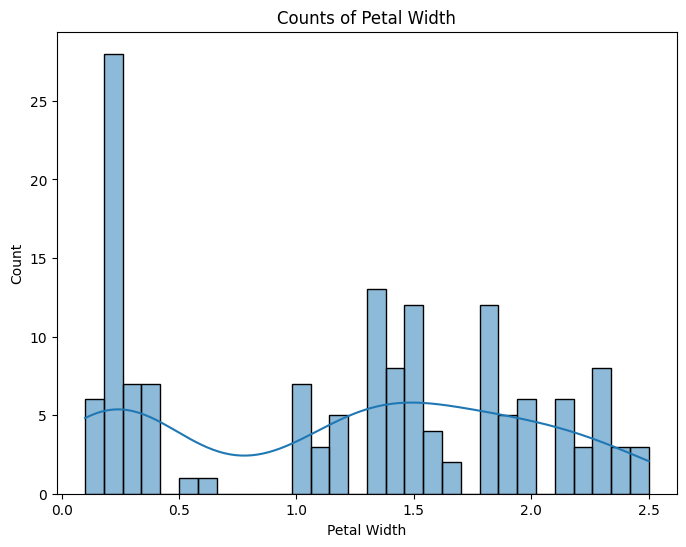

In [14]:
# Count of Petal Width
plt.figure(figsize=(8, 6))
sns.histplot(data= di, x='petal_width', bins=30, kde=True)
plt.title('Counts of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.show()

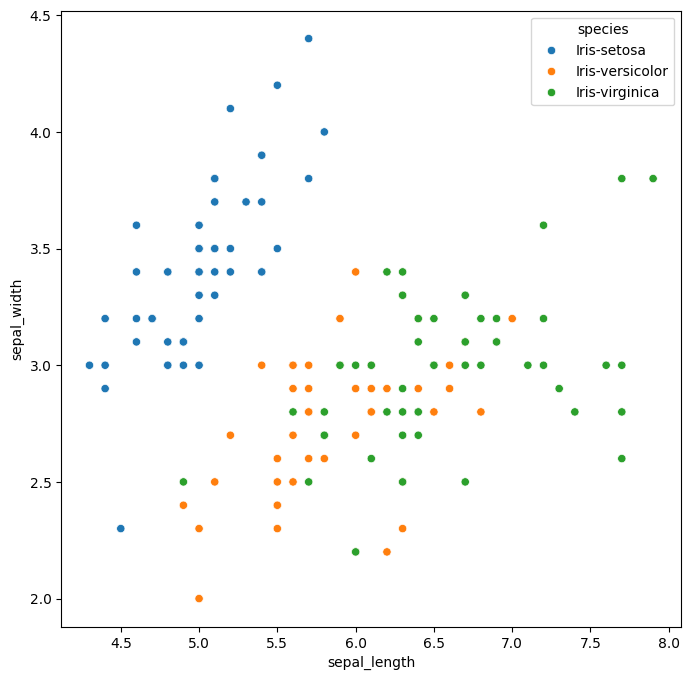

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=di)
plt.show()

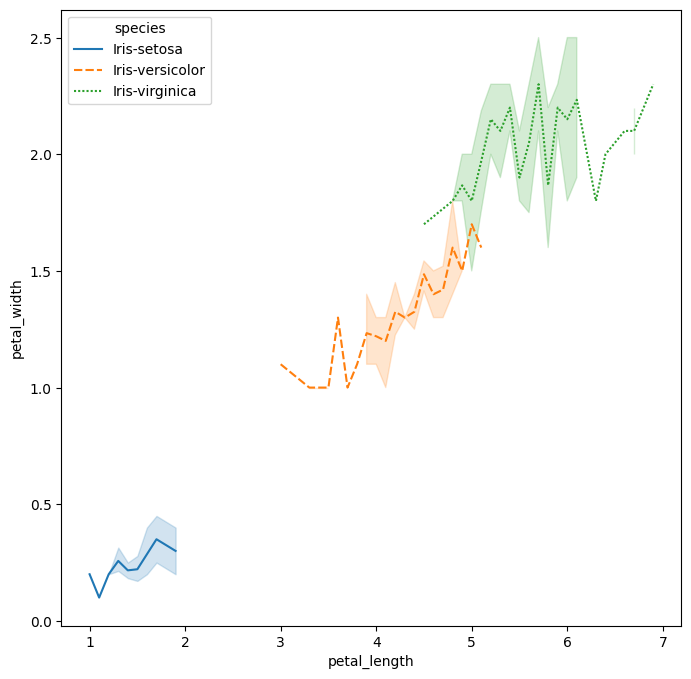

In [16]:
plt.figure(figsize=(8,8))
sns.lineplot(x="petal_length", y="petal_width", hue="species", style="species", data=di)
plt.show()

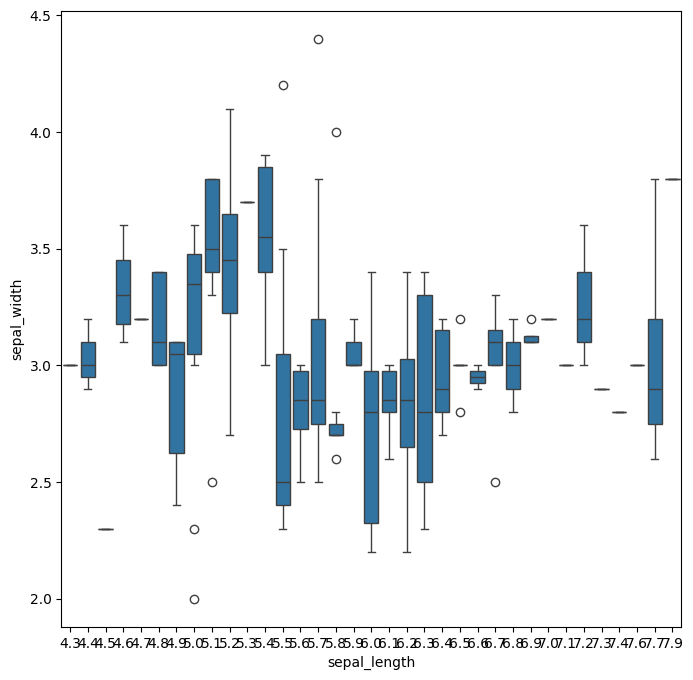

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x="sepal_length", y="sepal_width", data=di)
plt.show()

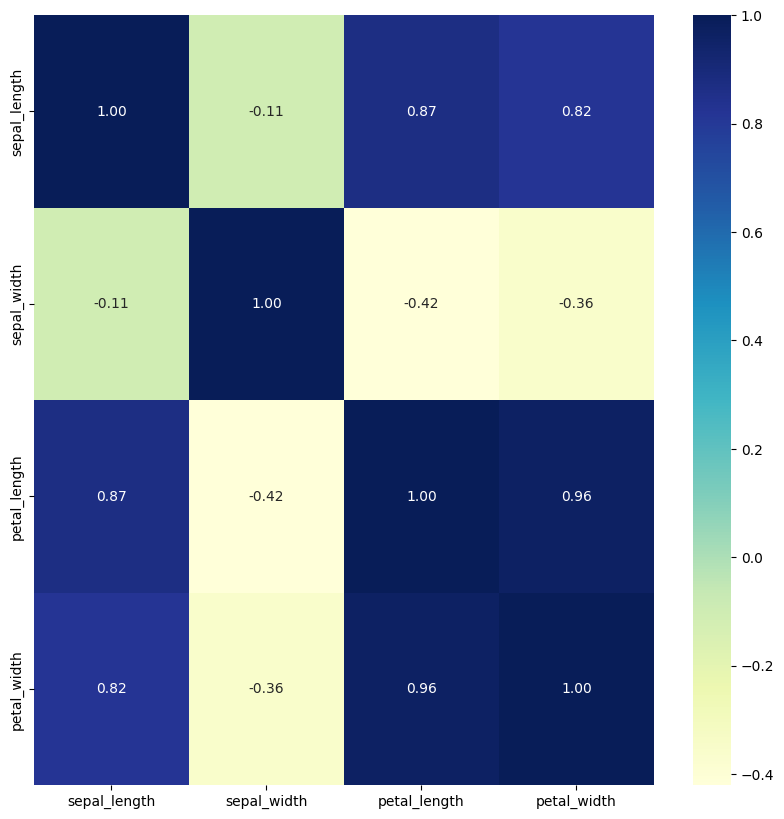

In [19]:
plt.subplots(figsize=(10, 10))
# Remove the species column before calculating correlation
sns.heatmap(di.drop('species', axis=1).corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

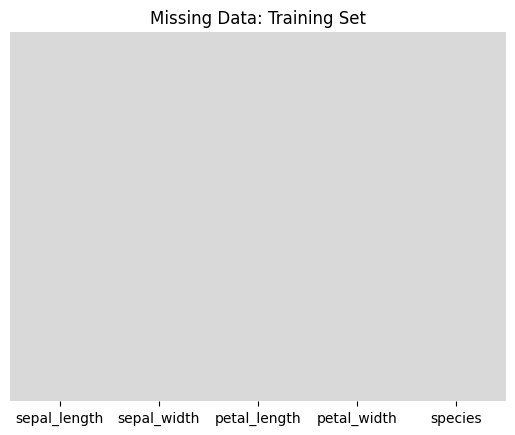

In [20]:
# Heatmap
sns.heatmap(di.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()


In [21]:
di.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [22]:
di.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Split the dataset into features (X) and target (y)
X = di.drop('species', axis=1)
y = di['species']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.3,
    random_state=42)

In [25]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (105, 4)
Shape of y_train: (105,)
Shape of X_test: (45, 4)
Shape of y_test: (45,)


In [26]:
# Model Selection
model = LogisticRegression()
# Model Training
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Model Evaluation
# Make predictions on the test data
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model's performance
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [32]:
# Evaluate the model's performance
from sklearn.metrics import confusion_matrix, classification_report # Import the classification_report function

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Also import the accuracy_score function

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 1.0


In [35]:

# Predict the species of a data_predict
data_predict = np.array([[5.1, 3.5, 1.4, 0.2]])
# Replace with your own sample measurements
predicted_species = model.predict(data_predict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
print("\nPredicted Species for data_predict:", predicted_species[0])


Predicted Species for data_predict: Iris-setosa
